<a href="https://colab.research.google.com/github/varshum12/DL-27-Nov-2025/blob/main/multiclass_classification_DL_29_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  file reading

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train_weather.csv')

### Basic data Quality Checks

In [4]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [7]:
# rename columns
df.rename(columns   =  {'Precipitation (%)' :  'Precipitation' ,
                        'Visibility (km)' : 'Visibility' } ,
                        inplace  = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [10]:
n  =  df.isnull().sum()
n[n>0]

,0


In [11]:
df.duplicated().sum()

np.int64(0)

## seperation of x and  y

In [12]:
x  =  df.drop('Weather Type' ,  axis =  1)
y  =  df['Weather Type']

In [13]:
x.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [14]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


### seperation  of cat  and  num

In [15]:
cat  =  x.columns[x.dtypes  == 'object']
num  =  x.columns[x.dtypes  != 'object']

In [16]:
print(cat)
print()
print(num)

Index(['Cloud Cover', 'Season', 'Location'], dtype='object')

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')


## create  pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from  sklearn.compose  import ColumnTransformer
from sklearn.impute  import SimpleImputer

In [18]:
num_pipeline  = Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  = 'mean' )) ,
                                    ('scaler' , StandardScaler())])


cat_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'most_frequent' )) ,
                                     ('encoder' , OrdinalEncoder())])

In [19]:
pre  =  ColumnTransformer([('num' ,  num_pipeline , num) ,
                           ('cat' , cat_pipeline , cat)] )

In [20]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

## Apply pipeline to data

In [21]:
x_scaled  =  pre.fit_transform(x)


In [22]:
x_scaled

array([[-0.29493119,  0.21240351, -0.04808565, ...,  3.        ,
         3.        ,  1.        ],
       [ 1.14303484,  1.35138482, -0.19283608, ...,  3.        ,
         1.        ,  1.        ],
       [ 0.62536707, -0.23328483, -0.40996172, ...,  0.        ,
         1.        ,  2.        ],
       ...,
       [ 0.62536707,  0.41048722, -0.62708737, ...,  2.        ,
         0.        ,  0.        ],
       [-0.92763624,  0.36096629,  0.02428956, ...,  2.        ,
         3.        ,  1.        ],
       [-1.38778537, -1.52082893, -1.42321472, ...,  2.        ,
         0.        ,  2.        ]])

In [23]:
# dataframe
x_scaled  =  pd.DataFrame(x_scaled  ,  columns  =  x.columns)

In [24]:
x_scaled.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,3.0,3.0,1.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,3.0,1.0,1.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,1.0,2.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,1.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,2.0,3.0,2.0


### convert target  variable  into  corresponding dimensions  for  model  fitting

In [35]:
y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [33]:

y_new  =  pd.get_dummies(y ,dtype  =  'int')


In [34]:
y_new

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
13195,0,1,0,0
13196,0,0,1,0
13197,1,0,0,0
13198,0,0,1,0


### train test  split

In [36]:
from sklearn.model_selection import train_test_split
x_train  ,  x_test  ,  y_train  , y_test  =  train_test_split(x_scaled  , y_new  ,
                                                              test_size    =  0.2  ,
                                                              random_state  =  45)

In [37]:
print(x_train.shape  ,  y_train.shape  )
print(x_test.shape  ,  y_test.shape)

(10560, 10) (10560, 4)
(2640, 10) (2640, 4)


In [27]:
y.unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

### create  Architecture

In [38]:
import keras
from keras.models  import Sequential
from keras.layers  import Dropout ,  Activation ,  BatchNormalization ,  Dense

In [53]:
nn  =  Sequential()

## add input  layer
nn.add(Dense(units  =  300  ,  input_dim  =  x_train.shape[1] , kernel_initializer='he_uniform'))
nn.add(Dropout(0.3))

## add  hidden layers
nn.add(Dense(units  =  400))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.3))

## add  hidden layers
nn.add(Dense(units  =  500))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.2))

nn.add(Dense(units  =  500))
nn.add(BatchNormalization())
nn.add(Activation('relu'))
nn.add(Dropout(0.2))


#  add  ouput layer
nn.add(Dense(units  =  4  ,  activation= 'softmax'))

In [54]:
## compile  model
nn.compile(optimizer='adam' ,  loss  = 'categorical_crossentropy' ,  metrics  = ['accuracy'])

In [55]:
nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │         2,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,304 (2.22 MB)

 Trainable params: 579,504 (2.21 MB)

 Non-trainable params: 2,800 (10.94 KB)

In [56]:
#  callbacks
from keras.callbacks  import EarlyStopping
er  = EarlyStopping(monitor  = 'val_loss' ,  patience  =  5)

In [58]:
## fit model
hist  =  nn.fit(x_train,  y_train ,
                batch_size= 512  ,
                epochs  =  100  ,
                callbacks  =  er  ,
                validation_split  =  0.2  )

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - accuracy: 0.9174 - loss: 0.1890 - val_accuracy: 0.9176 - val_loss: 0.1771
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9106 - loss: 0.1999 - val_accuracy: 0.9186 - val_loss: 0.1782
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9122 - loss: 0.1959 - val_accuracy: 0.9171 - val_loss: 0.1819
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9177 - loss: 0.1940 - val_accuracy: 0.9162 - val_loss: 0.1788
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9240 - loss: 0.1788 - val_accuracy: 0.9181 - val_loss: 0.1788
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9146 - loss: 0.1923 - val_accuracy: 0.9171 - val_loss: 0.1775


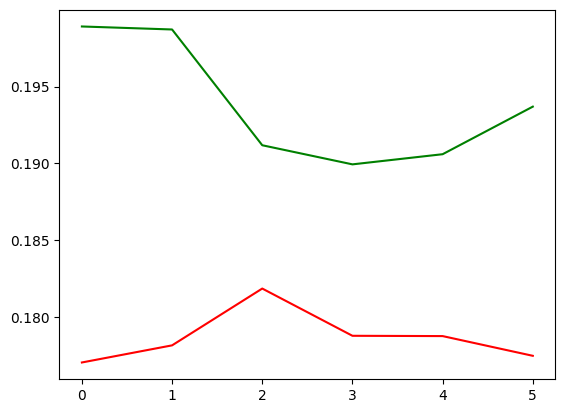

In [59]:
##  plot  graph
plt.plot(hist.history['loss'] , c  =  'green')
plt.plot(hist.history['val_loss'] , c  =  'red')

In [60]:
nn.evaluate(x_train,  y_train)

330/330 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9317 - loss: 0.1581


[0.16075119376182556, 0.9303030371665955]

In [61]:
nn.evaluate(x_test  , y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9050 - loss: 0.2026


[0.19523711502552032, 0.9106060862541199]

### model  evaluation

In [62]:
train_pred_prob  =  nn.predict(x_train)
train_pred_prob

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.9310258e-01, 1.3833548e-02, 5.3754734e-04, 7.9252636e-01],
       [8.3577152e-07, 3.2009198e-06, 9.9999297e-01, 2.9431587e-06],
       [1.7751144e-04, 9.9976546e-01, 6.9477954e-07, 5.6431178e-05],
       ...,
       [9.9976140e-01, 1.4053888e-05, 1.6789221e-04, 5.6637498e-05],
       [1.5901002e-01, 1.2396010e-01, 5.4570389e-01, 1.7132601e-01],
       [9.9999869e-01, 8.9007978e-07, 2.3022503e-07, 1.8541650e-07]],
      dtype=float32)

AttributeError: 'DataFrame' object has no attribute 'classes'

In [63]:
y_train.head()

,Cloudy,Rainy,Snowy,Sunny
6155,0,0,0,1
5575,0,0,1,0
8391,0,1,0,0
1867,0,0,0,1
1226,0,0,1,0


In [69]:
classes  =  y_new.columns
classes

Index(['Cloudy', 'Rainy', 'Snowy', 'Sunny'], dtype='object')

In [67]:
y_new.head()

,Cloudy,Rainy,Snowy,Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [76]:
y_train_act  =  []
for  i  in range(y_train.shape[0]):
  y_train_act.append(np.argmax(y_train.iloc[i  ,  :]))

In [78]:
y_train.head()

,Cloudy,Rainy,Snowy,Sunny
6155,0,0,0,1
5575,0,0,1,0
8391,0,1,0,0
1867,0,0,0,1
1226,0,0,1,0


In [77]:
y_train_act

[np.int64(3),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(3),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(0),
 np.int64(3),
 np.int64(1),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(3),
 np.int64(1),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(3),
 np.int64(0),
 np.int64(2),
 np.int64(2),
 np.int64(0),
 np.int64(0),
 np.int64(3),
 np.int64(2),
 np.int64(0),
 np.int64(2),
 np.int64(1),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.in

In [79]:
y_train_act1 = []
for  i  in y_train_act:
  y_train_act1.append(classes[i])

In [81]:
print(y_train_act1)

['Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Snowy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy',

In [82]:
y_train.head()

,Cloudy,Rainy,Snowy,Sunny
6155,0,0,0,1
5575,0,0,1,0
8391,0,1,0,0
1867,0,0,0,1
1226,0,0,1,0


In [87]:
train_pred  =  []
for  i  in train_pred_prob:
  train_pred.append(classes[np.argmax(i)])

In [89]:
print(train_pred)
print(y_train_act1)

['Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Cloudy', 'Snowy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Rainy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Snowy', 'Sunny', 'Cloudy', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Cloudy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Rainy', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Snowy', 'Rainy', 'Rainy', 'Snowy', 'Snowy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Cloudy', 'Rainy', 'Snowy', 'Sunny', 'Sunny', 'Cloudy

In [90]:
from sklearn.metrics import classification_report ,  confusion_matrix


In [92]:
print(classification_report(y_train_act1  ,  train_pred))

              precision    recall  f1-score   support

      Cloudy       0.91      0.91      0.91      2611
       Rainy       0.91      0.94      0.92      2638
       Snowy       0.97      0.93      0.95      2655
       Sunny       0.94      0.93      0.94      2656

    accuracy                           0.93     10560
   macro avg       0.93      0.93      0.93     10560
weighted avg       0.93      0.93      0.93     10560



In [93]:
confusion_matrix(y_train_act1  ,  train_pred)

array([[2387,  131,   24,   69],
       [  95, 2475,   29,   39],
       [  66,   54, 2481,   54],
       [  81,   68,   26, 2481]])

check for testing

In [101]:

y_test_act  =  []
for  i  in range(y_test.shape[0]):
  y_test_act.append(classes[np.argmax(y_test.iloc[i  ,  :])])

In [102]:
print(y_test_act)

['Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Snowy', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Sunny', 'Rainy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snow

In [103]:
y_test.head()

,Cloudy,Rainy,Snowy,Sunny
8849,0,1,0,0
11832,1,0,0,0
7733,0,1,0,0
5032,1,0,0,0
6497,0,1,0,0


In [105]:
test_pred_prob  = nn.predict(x_test)
test_pred_prob

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[2.2220185e-04, 9.9974257e-01, 1.7277376e-06, 3.3544424e-05],
       [9.9378562e-01, 6.1819232e-03, 4.6608202e-06, 2.7800219e-05],
       [2.9021592e-05, 9.9996495e-01, 5.0746070e-07, 5.4401712e-06],
       ...,
       [1.4192747e-03, 9.9855274e-01, 1.6264160e-06, 2.6255459e-05],
       [3.5080536e-09, 5.6594844e-09, 1.0000000e+00, 4.8667104e-08],
       [9.9998760e-01, 4.2739980e-06, 1.7711050e-06, 6.3912125e-06]],
      dtype=float32)

In [107]:
test_pred  =  []
for  i  in  test_pred_prob:
  test_pred.append(classes[np.argmax(i)])

In [108]:
print(test_pred)
print(y_test_act)

['Rainy', 'Cloudy', 'Rainy', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Rainy', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Cloudy', 'Sunny', 'Sunny', 'Snowy', 'Snowy', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Snowy', 'Sunny', 'Snowy', 'Sunny', 'Cloudy', 'Sunny', 'Snowy', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Sunny', 'Rainy', 'Sunny', 'Snowy', 'Snowy', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Snowy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Snowy', 'Rainy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Cloudy', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Snowy', 'Rainy', 'Snowy', 'Cloudy', 'Sunny', 'Cloudy', 'Snowy', 'Cloudy', 'Cloudy', 'Snowy', 'Snowy', 'Cloudy', 'Cloudy', 'Sunny', 'Snowy', 'Rainy', 'Sunny', 'Sno

In [109]:
print(classification_report(y_test_act  ,  test_pred))

              precision    recall  f1-score   support

      Cloudy       0.90      0.89      0.89       689
       Rainy       0.88      0.92      0.90       662
       Snowy       0.96      0.92      0.94       645
       Sunny       0.91      0.92      0.91       644

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [110]:
confusion_matrix(y_test_act  ,  test_pred)

array([[612,  42,   9,  26],
       [ 32, 606,   9,  15],
       [ 11,  21, 596,  17],
       [ 28,  19,   7, 590]])

###  apply on  unseen data  

In [111]:
test  =  pd.read_csv('test_weather.csv')

In [112]:
test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [113]:
test.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location'],
      dtype='object')

In [115]:
test.rename(columns  =  {'Precipitation (%)' :  'Precipitation' ,'Visibility (km)' :  'Visibility' } ,  inplace  =True)

In [116]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Cloud Cover', 'Season', 'Location'], dtype='object'))])

In [117]:
test_scaled  =  pre.fit_transform(test)

In [119]:
test_scaled =  pd.DataFrame(x_scaled  , columns  =  x.columns)

In [120]:
pred =  nn.predict(test_scaled)

413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
